In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from qmplot import manhattanplot
import re
from numpy.linalg import inv
from pathlib import Path 
from scipy.stats import chisquare

In [2]:
df_candidate = pd.read_table("../output_csv/df_candidate.csv", low_memory=False, sep=";")

In [3]:
df_candidate

,chromosome,base_pair_location,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z
0,1,693731,A,G,0.393443,-1.322034,-0.129630,0.369748,-0.193548,-0.223242
1,1,180518603,T,C,-0.340426,1.219512,1.566667,0.388489,-0.390244,-1.887906
2,1,180518806,A,C,-0.097561,-0.297297,0.444444,-1.069231,0.780488,0.098940
3,1,180519091,T,G,0.666667,-0.086957,-0.705882,-1.675000,-1.875000,-1.523077
4,1,180519109,T,C,-0.877551,-0.046512,-2.000000,0.022222,-1.076923,-0.805471
...,...,...,...,...,...,...,...,...,...,...
44245761,24,1832945,A,G,NaN,NaN,-0.632013,NaN,NaN,NaN
44245762,24,1832475,T,C,NaN,NaN,0.172690,NaN,NaN,NaN
44245763,25,13276,T,C,NaN,NaN,NaN,NaN,-1.918919,NaN
44245764,26,24385419,A,G,NaN,NaN,NaN,NaN,0.289474,NaN


In [4]:
df_candidate = df_candidate[['chromosome', 'base_pair_location', 'effect_allele', 'other_allele', 'fi_z', 'fg_z', 'hba1c_z', 't2d_z', 'bmi_z', 'gcn_z']]

In [5]:
df_candidate

,chromosome,base_pair_location,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z
0,1,693731,A,G,0.393443,-1.322034,-0.129630,0.369748,-0.193548,-0.223242
1,1,180518603,T,C,-0.340426,1.219512,1.566667,0.388489,-0.390244,-1.887906
2,1,180518806,A,C,-0.097561,-0.297297,0.444444,-1.069231,0.780488,0.098940
3,1,180519091,T,G,0.666667,-0.086957,-0.705882,-1.675000,-1.875000,-1.523077
4,1,180519109,T,C,-0.877551,-0.046512,-2.000000,0.022222,-1.076923,-0.805471
...,...,...,...,...,...,...,...,...,...,...
44245761,24,1832945,A,G,NaN,NaN,-0.632013,NaN,NaN,NaN
44245762,24,1832475,T,C,NaN,NaN,0.172690,NaN,NaN,NaN
44245763,25,13276,T,C,NaN,NaN,NaN,NaN,-1.918919,NaN
44245764,26,24385419,A,G,NaN,NaN,NaN,NaN,0.289474,NaN


Calculate sum z values

In [6]:
z = df_candidate[['fi_z', 'fg_z', 'hba1c_z', 't2d_z', 'bmi_z', 'gcn_z']].to_numpy()

In [7]:
z

array([[ 0.39344262, -1.3220339 , -0.12962963,  0.3697479 , -0.19354839,
        -0.22324159],
       [-0.34042553,  1.2195122 ,  1.56666667,  0.38848921, -0.3902439 ,
        -1.8879056 ],
       [-0.09756098, -0.2972973 ,  0.44444444, -1.06923077,  0.7804878 ,
         0.09893993],
       ...,
       [        nan,         nan,         nan,         nan, -1.91891892,
                nan],
       [        nan,         nan,         nan,         nan,  0.28947368,
                nan],
       [        nan,         nan,         nan,         nan, -1.125     ,
                nan]])

In [8]:
z_scores = df_candidate[['fi_z', 'fg_z', 'hba1c_z', 't2d_z', 'bmi_z', 'gcn_z']]

In [9]:
correlation =np.loadtxt('correlation.txt', usecols=range(6))

In [11]:
correlation

array([[ 1.        ,  0.19626832,  0.04210314,  0.06468955, -0.02090571,
         0.01468997],
       [ 0.19626832,  1.        ,  0.12033641,  0.11429107, -0.01053008,
        -0.00171142],
       [ 0.04210314,  0.12033641,  1.        ,  0.11435733,  0.03385854,
         0.0039523 ],
       [ 0.06468955,  0.11429107,  0.11435733,  1.        ,  0.30049848,
         0.01082679],
       [-0.02090571, -0.01053008,  0.03385854,  0.30049848,  1.        ,
         0.01309615],
       [ 0.01468997, -0.00171142,  0.0039523 ,  0.01082679,  0.01309615,
         1.        ]])

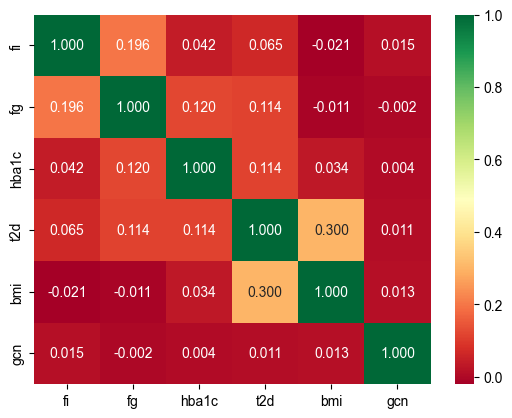

In [12]:
import seaborn as sns
labels = (np.asarray(["{0:.3f}".format(value)
                      for value in np.array(correlation).flatten()])
         ).reshape(6, 6)

fig, ax = plt.subplots()
ticklabels = ['fi', 'fg', 'hba1c', 't2d', 'bmi', 'gcn']
sns.heatmap(correlation, annot=labels, fmt="", cmap='RdYlGn', ax=ax, yticklabels = ticklabels, xticklabels = ticklabels)
plt.show()

In [13]:
row_sum_z = np.sum(np.nan_to_num(z), axis = 1)

In [14]:
row_sum_z

array([-1.10526298,  0.55609303, -0.14021686, ..., -1.91891892,
        0.28947368, -1.125     ])

In [15]:
np.square(row_sum_z)

array([1.22160626, 0.30923946, 0.01966077, ..., 3.68224982, 0.08379501,
       1.265625  ])

In [16]:
row_sum_cor = np.sum(correlation, axis = 1)

In [17]:
row_sum_cor

array([1.29684528, 1.41865429, 1.31460772, 1.60466322, 1.31601738,
       1.04085379])

In [19]:
scores = np.divide(np.square(row_sum_z).reshape(row_sum_z.shape[0],1),row_sum_cor.reshape(1,6))

In [20]:
scores

array([[0.94198305, 0.86110215, 0.92925535, 0.76128514, 0.92825997,
        1.17365789],
       [0.23845517, 0.21798084, 0.23523326, 0.192713  , 0.23498129,
        0.29710173],
       [0.01516046, 0.01385875, 0.01495562, 0.01225227, 0.0149396 ,
        0.01888908],
       ...,
       [2.83939024, 2.59559348, 2.80102555, 2.29471815, 2.79802521,
        3.53772052],
       [0.0646145 , 0.05906655, 0.06374146, 0.05221969, 0.06367318,
        0.08050604],
       [0.97592598, 0.89213067, 0.96273967, 0.7887169 , 0.96170842,
        1.21594888]])

In [23]:
from scipy.stats import chisquare
sum_z_p_values = []
count = 0
for s in scores:
    if(count%1000000 == 0):
        print("------", count, "--------")
    sum_z_p_values.append(chisquare(s, ddof = 4)[1])
    count+= 1

------ 0 --------
------ 1000000 --------
------ 2000000 --------
------ 3000000 --------
------ 4000000 --------
------ 5000000 --------
------ 6000000 --------
------ 7000000 --------
------ 8000000 --------
------ 9000000 --------
------ 10000000 --------
------ 11000000 --------
------ 12000000 --------
------ 13000000 --------
------ 14000000 --------
------ 15000000 --------
------ 16000000 --------
------ 17000000 --------
------ 18000000 --------
------ 19000000 --------
------ 20000000 --------
------ 21000000 --------
------ 22000000 --------
------ 23000000 --------
------ 24000000 --------
------ 25000000 --------
------ 26000000 --------
------ 27000000 --------
------ 28000000 --------
------ 29000000 --------
------ 30000000 --------
------ 31000000 --------
------ 32000000 --------
------ 33000000 --------
------ 34000000 --------
------ 35000000 --------
------ 36000000 --------
------ 37000000 --------
------ 38000000 --------
------ 39000000 --------
------ 40000000 

In [24]:
sum_z_p_values

[0.75256610009177,
 0.8739713204518922,
 0.9680975206328738,
 0.13807498114560277,
 0.1723718904607593,
 0.23882259064111536,
 0.21387044927378693,
 0.0589912064827213,
 0.23874399066048252,
 0.1522489577578,
 0.983997984871741,
 0.21071624182862964,
 0.21657781993811415,
 0.2253921683226055,
 0.22562065667752035,
 0.048600273439290874,
 0.031112649120084046,
 0.04481180431962827,
 0.8888820595811342,
 0.044338360545880855,
 0.047301719652577755,
 0.993259381134311,
 0.9679998967301573,
 0.03271088905305025,
 0.14920652437200443,
 0.9972933425103087,
 0.929239745432023,
 0.04547282988615108,
 0.37299182001833486,
 0.9098154684002793,
 0.49126943906891785,
 0.8618086699744321,
 0.14643837616306948,
 0.10059720075269477,
 0.4861995241580218,
 0.8556768978563934,
 0.652072579632655,
 0.15104961495687672,
 0.9949244904967453,
 0.034305172265178846,
 0.14706870132691416,
 0.7270132317874287,
 0.14903041177404056,
 0.9618274756759344,
 0.9705816066750307,
 0.1496215334819643,
 0.373892692185

In [25]:
np.savetxt('sum_z.txt', sum_z_p_values)

In [26]:
df_candidate["p_values_sum_z"] = sum_z_p_values

In [27]:
df_candidate

,chromosome,base_pair_location,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,p_values_sum_z
0,1,693731,A,G,0.393443,-1.322034,-0.129630,0.369748,-0.193548,-0.223242,0.752566
1,1,180518603,T,C,-0.340426,1.219512,1.566667,0.388489,-0.390244,-1.887906,0.873971
2,1,180518806,A,C,-0.097561,-0.297297,0.444444,-1.069231,0.780488,0.098940,0.968098
3,1,180519091,T,G,0.666667,-0.086957,-0.705882,-1.675000,-1.875000,-1.523077,0.138075
4,1,180519109,T,C,-0.877551,-0.046512,-2.000000,0.022222,-1.076923,-0.805471,0.172372
...,...,...,...,...,...,...,...,...,...,...,...
44245761,24,1832945,A,G,NaN,NaN,-0.632013,NaN,NaN,NaN,0.856940
44245762,24,1832475,T,C,NaN,NaN,0.172690,NaN,NaN,NaN,0.960715
44245763,25,13276,T,C,NaN,NaN,NaN,NaN,-1.918919,NaN,0.584146
44245764,26,24385419,A,G,NaN,NaN,NaN,NaN,0.289474,NaN,0.934195


In [28]:
df_candidate[np.abs(df_candidate.p_values_sum_z) < 5e-8]

,chromosome,base_pair_location,effect_allele,other_allele,fi_z,fg_z,hba1c_z,t2d_z,bmi_z,gcn_z,p_values_sum_z
41913,1,177864136,A,T,0.318182,0.842105,-0.285714,-5.222222,-15.772727,0.040462,1.019480e-08
41934,1,177855517,A,C,-1.200000,-0.619048,0.875000,6.712500,21.571429,0.505376,1.983245e-15
41937,1,177856925,T,C,0.684211,0.000000,0.000000,-3.671642,-15.705882,-0.795349,2.716182e-08
41957,1,177873210,T,G,-1.260870,-0.428571,0.937500,6.762500,23.100000,0.449198,3.414941e-17
41960,1,177873383,A,T,-0.900000,0.444444,0.461538,4.397059,18.352941,0.660494,2.403258e-11
...,...,...,...,...,...,...,...,...,...,...,...
43962697,23,2768617,T,C,-11.667634,-12.827826,-1.390110,NaN,NaN,NaN,1.542733e-13
43963656,23,2751686,T,G,8.497667,12.028205,0.074373,NaN,NaN,NaN,4.206243e-09
44070188,23,146707638,C,G,11.468830,8.150877,0.573643,NaN,NaN,NaN,8.420785e-09
44126336,23,46514865,A,G,NaN,NaN,24.384444,NaN,NaN,NaN,3.519368e-12


In [1]:
dash_bio.ManhattanPlot(
    dataframe=df_plot.reset_index(),
    highlight_color='#00FFAA',
    suggestiveline_color='#AA00AA',
    genomewideline_color='#AA5500'
)

NameError: name 'dash_bio' is not defined